In [149]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [150]:
import librosa 
import librosa.display

In [151]:
os.chdir("d:\Audio Classification Drone\DroneAudioDataset-master\Binary_Drone_Audio")

In [152]:
os.getcwd()

'd:\\Audio Classification Drone\\DroneAudioDataset-master\\Binary_Drone_Audio'

In [153]:
print(os.listdir())

['df.csv', 'df_with_svm.csv', 'unknown', 'yes_drone']


In [154]:
path=os.getcwd()
file_name1="unknown"
file_name2="yes_drone"
unknown_audio_path=os.path.join(path,file_name1)
drone_audio_path=os.path.join(path,file_name2)
print("The path for unknown audio is : ",unknown_audio_path)
print("The path for drone audio is   : ",drone_audio_path) 

The path for unknown audio is :  d:\Audio Classification Drone\DroneAudioDataset-master\Binary_Drone_Audio\unknown
The path for drone audio is   :  d:\Audio Classification Drone\DroneAudioDataset-master\Binary_Drone_Audio\yes_drone


In [155]:
for root, directories, files in os.walk(unknown_audio_path):
    print(root)
    print(files)

d:\Audio Classification Drone\DroneAudioDataset-master\Binary_Drone_Audio\unknown
['1-100032-A-00.wav', '1-100032-A-01.wav', '1-100032-A-02.wav', '1-100032-A-03.wav', '1-100032-A-04.wav', '1-100038-A-140.wav', '1-100038-A-141.wav', '1-100038-A-142.wav', '1-100038-A-143.wav', '1-100038-A-144.wav', '1-100210-A-360.wav', '1-100210-A-361.wav', '1-100210-A-362.wav', '1-100210-A-363.wav', '1-100210-A-364.wav', '1-100210-B-360.wav', '1-100210-B-361.wav', '1-100210-B-362.wav', '1-100210-B-363.wav', '1-100210-B-364.wav', '1-101296-A-190.wav', '1-101296-A-191.wav', '1-101296-A-192.wav', '1-101296-A-193.wav', '1-101296-A-194.wav', '1-101296-B-190.wav', '1-101296-B-191.wav', '1-101296-B-192.wav', '1-101296-B-193.wav', '1-101296-B-194.wav', '1-101336-A-300.wav', '1-101336-A-301.wav', '1-101336-A-302.wav', '1-101336-A-303.wav', '1-101336-A-304.wav', '1-101404-A-340.wav', '1-101404-A-341.wav', '1-101404-A-342.wav', '1-101404-A-343.wav', '1-101404-A-344.wav', '1-103298-A-90.wav', '1-103298-A-91.wav', 

In [156]:
def get_file_paths(dirname):
    file_paths = []  
    for root, directories, files in os.walk(dirname):
        for filename in files:
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)  
    return file_paths 

In [157]:
unknown_audio = get_file_paths(unknown_audio_path)
drone_audio = get_file_paths(drone_audio_path)

In [158]:
drone_audio[12]

'd:\\Audio Classification Drone\\DroneAudioDataset-master\\Binary_Drone_Audio\\yes_drone\\B_S2_D1_069-bebop_002_.wav'

In [159]:
unknown_audio[45]

'd:\\Audio Classification Drone\\DroneAudioDataset-master\\Binary_Drone_Audio\\unknown\\1-103995-A-300.wav'

In [160]:
unknown_audio = unknown_audio[0:1500]

In [161]:
len(unknown_audio)

1500

In [162]:
len(drone_audio)

1362

Sample rate :  22050


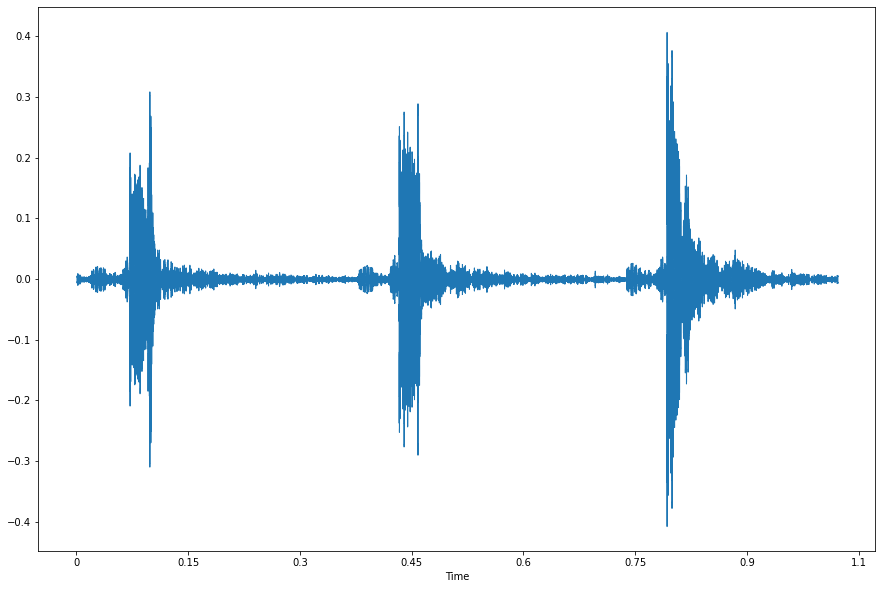

In [163]:
import IPython.display as ipd

plt.figure(figsize=(15,10))
filename=unknown_audio[150]
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
print("Sample rate : " , sample_rate)
ipd.Audio(filename)


In [164]:
data

array([ 0.00270258,  0.00275355,  0.00240011, ..., -0.00562369,
       -0.00454897,  0.        ], dtype=float32)

In [165]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)
print("Actual sample rate : " , wave_sample_rate )   # Actual sample rate
print("Wave audio : " , wave_audio)

Actual sample rate :  16000
Wave audio :  [  89   80  115 ... -178 -160 -169]


# Data PreProcessing

In [166]:
len(drone_audio)

1362

In [167]:
len(unknown_audio)

1500

Sample rate :  22050


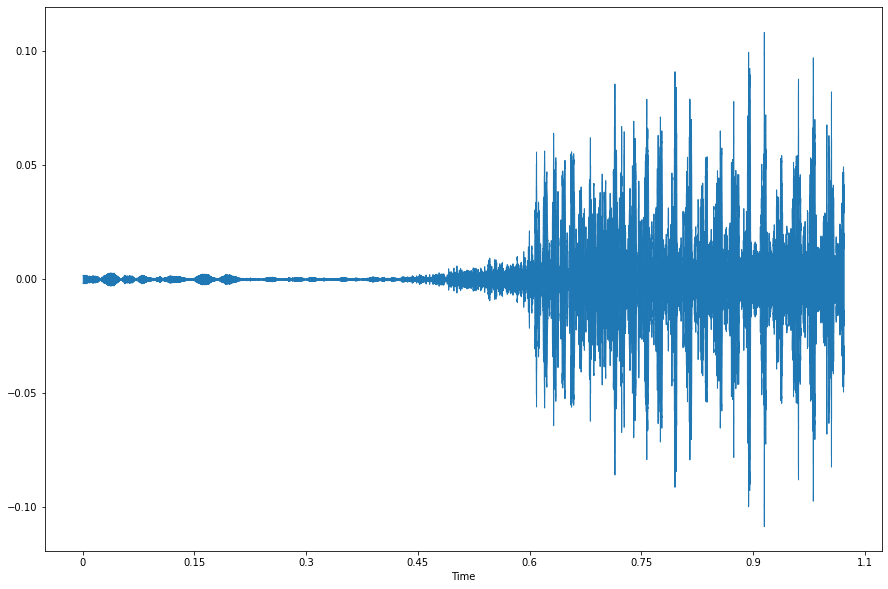

In [168]:
# Analyzing random unknown audio

plt.figure(figsize=(15,10))
filename= unknown_audio[np.random.randint(0, len(unknown_audio))]
librosa_data,librosa_sample_rate=librosa.load(filename)
librosa.display.waveshow(librosa_data, sr=sample_rate)
print("Sample rate : " , librosa_sample_rate)
ipd.Audio(filename)


Sample rate :  16000


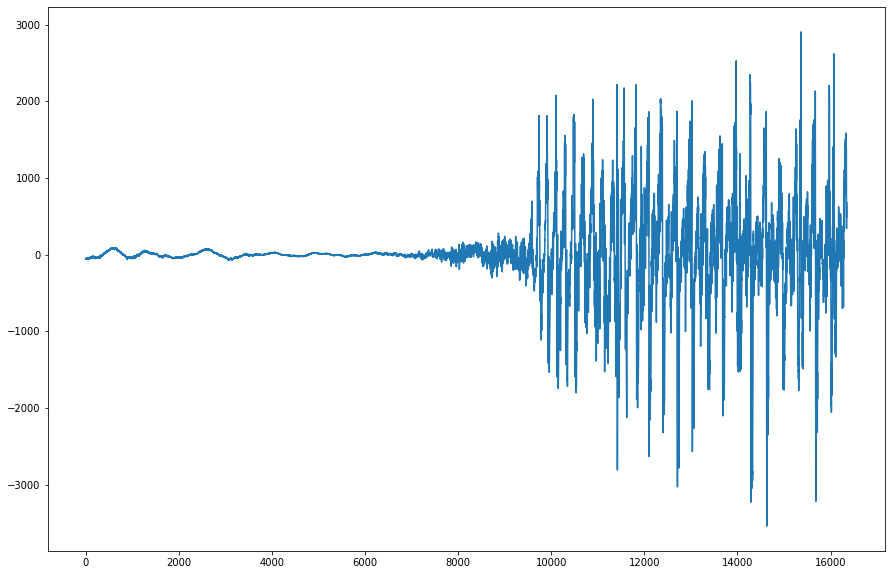

In [169]:
wave_sample_rate, wave_audio = wav.read(filename)
print("Sample rate : " , wave_sample_rate)   # Actual sample rate

plt.figure(figsize=(15,10))
plt.plot(wave_audio)
plt.show()

# Extracting Features ( MFCC's)

In [170]:
mfccs= librosa.feature.mfcc(y=librosa_data, sr=librosa_sample_rate , n_mfcc=40)
mfccs.shape

(40, 45)

In [171]:
mfccs

array([[-6.4324225e+02, -6.3499353e+02, -6.3803387e+02, ...,
        -2.7808539e+02, -2.6937961e+02, -3.0014243e+02],
       [ 1.0203627e+02,  1.0099606e+02,  9.3801651e+01, ...,
         1.6419432e+02,  1.5040222e+02,  1.2910516e+02],
       [ 2.1018040e+01,  1.4757216e+01,  1.4801950e+01, ...,
        -2.9319538e+01, -1.9933475e+01, -1.0013998e+01],
       ...,
       [ 5.0422258e+00,  4.4031177e+00,  4.3882747e+00, ...,
        -4.3973083e+00, -3.9087214e+00, -2.0964003e+00],
       [ 3.7578130e+00,  2.8831241e+00,  3.9226410e+00, ...,
         3.5649788e+00,  8.2605046e-01, -1.0460913e-02],
       [ 5.0983820e+00,  3.9066868e+00,  4.2366776e+00, ...,
        -6.5748310e+00, -2.8873158e+00,  1.6995270e+00]], dtype=float32)

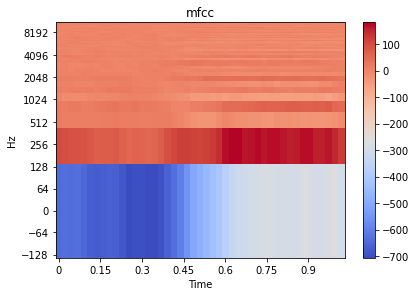

In [172]:
librosa.display.specshow(mfccs, x_axis='time',y_axis='log')
plt.colorbar()
plt.tight_layout()
plt.title('mfcc')
plt.show()

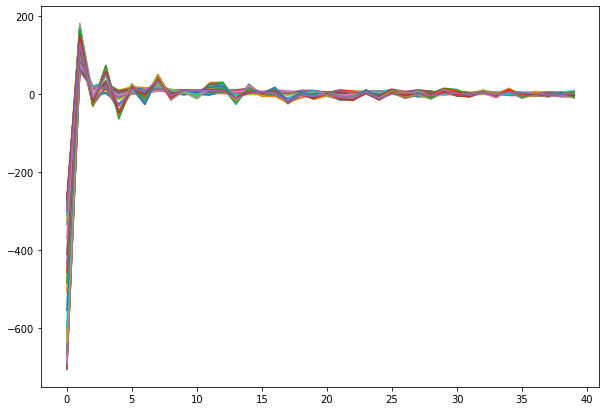

In [173]:
plt.figure(figsize=(10,7))
plt.plot(mfccs)
plt.show()

# Plotting Spectogram

In [174]:
D=librosa.stft(librosa_data)
D

array([[-3.5628018e-01+0.0000000e+00j,  2.5170127e-01+0.0000000e+00j,
         4.9932313e-01+0.0000000e+00j, ...,
         5.0461638e-01+0.0000000e+00j,  7.7276474e-01+0.0000000e+00j,
         2.0807688e+00+0.0000000e+00j],
       [ 4.3152046e-01-1.4434491e-01j, -2.0962948e-01+7.6349604e-01j,
        -4.4701084e-01-5.2780402e-01j, ...,
        -6.5834117e-01-1.0671343e+00j,  6.8495625e-01+1.2585038e+00j,
        -2.3848658e+00+4.0659361e-02j],
       [-1.8493131e-01+3.9986169e-01j, -2.6675839e-02-8.6287886e-01j,
         2.8965235e-01+8.9539051e-01j, ...,
         4.4996336e-01+1.1756158e+00j, -1.7625321e+00-8.0531204e-01j,
         2.5877473e+00+2.8243294e-01j],
       ...,
       [-5.5668398e-04+3.3069766e-06j,  2.7751687e-04-1.6589695e-06j,
        -2.5180595e-09+1.0977092e-08j, ...,
         2.1436988e-07+1.7626647e-07j,  2.2302174e-03+2.4873924e-07j,
        -4.4613327e-03-6.6925963e-07j],
       [ 5.5668753e-04-1.6514790e-06j, -8.1826875e-07-2.7751148e-04j,
         5.6904756e-09

In [175]:
S_db=librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 45)

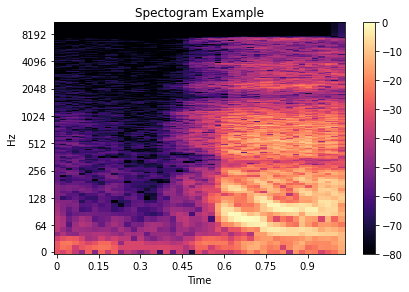

In [176]:
librosa.display.specshow(S_db, x_axis='time',y_axis='log')
plt.colorbar()
plt.tight_layout()
plt.title('Spectogram Example')
plt.show()

# Plotting Mel Spectogram

In [177]:
S=librosa.feature.melspectrogram(y = librosa_data, sr= librosa_sample_rate, n_mels=128)
S

array([[1.0967712e-02, 3.7841544e-02, 4.3164145e-02, ..., 4.7406322e-01,
        5.1826209e-01, 7.3115599e-01],
       [1.4199471e-03, 1.7639387e-03, 2.3780698e-03, ..., 1.0954963e+00,
        9.3093956e-01, 5.5241835e-01],
       [1.1604236e-03, 5.0808582e-04, 3.8978986e-05, ..., 1.6061416e+00,
        9.4313818e-01, 3.9422938e-01],
       ...,
       [2.9789989e-08, 7.4023401e-09, 9.3105382e-18, ..., 1.8203494e-15,
        4.8346959e-07, 1.9344843e-06],
       [2.9249765e-08, 7.2686213e-09, 9.1807097e-18, ..., 1.2742468e-15,
        4.7190809e-07, 1.8880744e-06],
       [2.8909794e-08, 7.1844508e-09, 7.1195824e-18, ..., 1.6011243e-15,
        4.6477885e-07, 1.8594624e-06]], dtype=float32)

In [178]:
S.shape

(128, 45)

In [179]:
S_db_mel=librosa.amplitude_to_db(S, ref=np.max)
S_db_mel.shape

(128, 45)

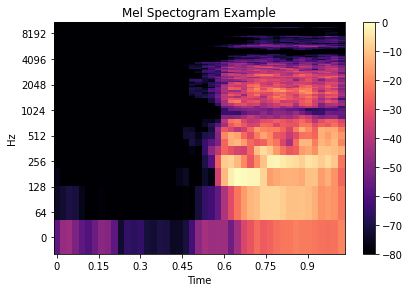

In [180]:
librosa.display.specshow(S_db_mel, x_axis='time',y_axis='log')
plt.colorbar()
plt.tight_layout()
plt.title('Mel Spectogram Example')
plt.show()

<BarContainer object of 45 artists>

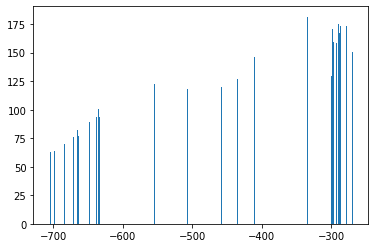

In [181]:
plt.bar(mfccs[0], mfccs[1])

In [182]:
# Extracting mfccs for all files

def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [183]:
%%time
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

extracted_features1=[]

for i in unknown_audio:
    final_class_labels= "Unknown"
    data =features_extractor(i)
    extracted_features1.append([data,final_class_labels])

Wall time: 50.4 s


In [184]:
extracted_features1

[[array([-1131.371,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ], dtype=float32),
  'Unknown'],
 [array([-1131.371,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0. 

In [185]:
len(extracted_features1)

1500

In [186]:
%%time
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

extracted_features2=[]
for i in drone_audio:
    final_class_labels= "Drone"
    data =features_extractor(i)
    extracted_features2.append([data,final_class_labels])

Wall time: 44.9 s


In [187]:
len(extracted_features2)

1362

In [188]:
extracted_features = extracted_features1 + extracted_features2

In [189]:
extracted_features

[[array([-1131.371,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ], dtype=float32),
  'Unknown'],
 [array([-1131.371,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0.   ,     0.   ,     0.   ,     0.   ,     0.   ,     0.   ,
             0. 

In [190]:
len(extracted_features)

2862

In [191]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-1131.371, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Unknown
1,"[-1131.371, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Unknown
2,"[-498.26956, 37.80668, -55.754177, -10.324256,...",Unknown
3,"[-1131.371, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Unknown
4,"[-1131.3708, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",Unknown


In [192]:
extracted_features_df.tail(10)

,feature,class
2852,"[-200.83957, 133.76237, -76.868324, 84.69713, ...",Drone
2853,"[-185.7366, 129.92941, -64.90726, 83.83066, -4...",Drone
2854,"[-190.476, 129.27582, -74.03415, 83.721596, -5...",Drone
2855,"[-197.13873, 134.91457, -74.79532, 85.94157, -...",Drone
2856,"[-195.90636, 135.9551, -75.30788, 85.28185, -5...",Drone
2857,"[-133.07375, 144.86934, -95.89965, 38.423218, ...",Drone
2858,"[-169.47023, 124.91743, -92.00741, 46.363953, ...",Drone
2859,"[-344.96667, 64.57258, -81.73451, 92.59311, -5...",Drone
2860,"[-327.02176, 73.61897, -79.09935, 89.73264, -5...",Drone
2861,"[-327.42532, 81.825066, -61.10197, 81.37957, -...",Drone


In [193]:
extracted_features_df['class'].value_counts()

Unknown    1500
Drone      1362
Name: class, dtype: int64

In [194]:
extracted_features_df.to_csv('df_with_svm.csv')

In [195]:
df=pd.read_csv('df_with_svm.csv',index_col=[0])
df.head()

,feature,class
0,[-1131.371 0. 0. 0. 0...,Unknown
1,[-1131.371 0. 0. 0. 0...,Unknown
2,[-4.9826956e+02 3.7806679e+01 -5.5754177e+01 ...,Unknown
3,[-1131.371 0. 0. 0. 0...,Unknown
4,[-1131.3708 0. 0. 0. ...,Unknown


In [196]:
df.dtypes

feature    object
class      object
dtype: object

In [197]:
df_svm = extracted_features_df.copy()
df_svm.head()

,feature,class
0,"[-1131.371, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Unknown
1,"[-1131.371, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Unknown
2,"[-498.26956, 37.80668, -55.754177, -10.324256,...",Unknown
3,"[-1131.371, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Unknown
4,"[-1131.3708, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",Unknown


In [198]:
df_svm['class'].replace(['Unknown','Drone'],[0,1],inplace=True)

In [199]:
df_svm.head()

,feature,class
0,"[-1131.371, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
1,"[-1131.371, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
2,"[-498.26956, 37.80668, -55.754177, -10.324256,...",0
3,"[-1131.371, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
4,"[-1131.3708, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0


In [200]:
### Split the dataset into independent and dependent dataset
X=np.array(df_svm['feature'].tolist())
y=np.array(df_svm['class'].tolist())

In [201]:
X

array([[-1.1313710e+03,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.1313710e+03,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-4.9826956e+02,  3.7806679e+01, -5.5754177e+01, ...,
        -3.9741334e-01, -3.7072861e-01,  3.8132513e-01],
       ...,
       [-3.4496667e+02,  6.4572578e+01, -8.1734512e+01, ...,
        -5.6379437e+00,  7.9276118e+00, -4.3331900e+00],
       [-3.2702176e+02,  7.3618973e+01, -7.9099350e+01, ...,
        -4.7030883e+00,  4.6343365e+00, -1.3439516e+00],
       [-3.2742532e+02,  8.1825066e+01, -6.1101971e+01, ...,
        -4.4217067e+00,  5.1522150e+00, -6.8395395e+00]], dtype=float32)

In [202]:
X.dtype

dtype('float32')

In [203]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [204]:
X.shape

(2862, 40)

In [205]:
y.shape

(2862,)

In [206]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
# import tensorflow as tf
# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# y=to_categorical(labelencoder.fit_transform(y))





In [207]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [208]:
#print(tf.math.argmax(y,axis=1))

In [209]:
y.dtype

dtype('int32')

In [210]:
y.shape

(2862,)

In [211]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [212]:
X_train

array([[-2.86502686e+02,  5.62719612e+01, -6.25083427e+01, ...,
        -5.31864309e+00,  3.53585958e-01, -6.30149937e+00],
       [-4.05693054e+02,  1.19243095e+02, -4.72020760e+01, ...,
         1.00573909e+00, -2.09324646e+00,  1.55585694e+00],
       [-3.79394775e+02,  1.52470596e+02, -8.88510590e+01, ...,
        -2.04868817e+00,  4.30784762e-01,  3.08333516e+00],
       ...,
       [-1.25148506e+02,  1.04194290e+02, -5.53419609e+01, ...,
        -6.10795975e-01, -1.29217759e-01,  2.65444374e+00],
       [-1.67347076e+02,  1.47223923e+02, -3.21387215e+01, ...,
         2.99479294e+00,  6.91024113e+00, -1.88974798e-01],
       [-2.06373444e+02,  1.54436508e+02, -6.80307484e+00, ...,
         4.87723875e+00,  1.39540756e+00,  3.49131599e-02]], dtype=float32)

In [213]:
X_train.shape , X_test.shape

((2003, 40), (859, 40))

In [214]:
y_train.shape, y_test.shape

((2003,), (859,))

In [215]:
### No of classes
num_labels=2

In [216]:
num_labels

2

In [217]:
#y_copy=y_train.copy()

In [218]:
#y_copy.shape

In [219]:
#(y_copy.ravel()).shape

In [220]:
#y_copy=y_copy.ravel()

In [221]:
#x_copy=X_train.copy()


In [222]:
#x_copy.reshape(-1,1).shape

# SVM

In [223]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# clf = GridSearchCV( SVC(), 
#                    { 'C' : [0.01,0.1,1,10,20,50,100],
#                     'gamma':[1,0.1,0.01,0.001],
#                     'kernel':['rbf','linear','poly']} , cv=10, return_train_score=False )

In [224]:
# clf.fit(X_train,y_train)

## Linear Kernel

In [225]:
# Linear Kernel
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train,y_train)



SVC(kernel='linear')

In [226]:
from sklearn.metrics import classification_report,accuracy_score
predictions_linear = clf_linear.predict(X_test)
print(classification_report(y_test, predictions_linear))
print("Accuracy is : " , accuracy_score(y_test, predictions_linear))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       464
           1       0.97      0.96      0.96       395

    accuracy                           0.97       859
   macro avg       0.97      0.97      0.97       859
weighted avg       0.97      0.97      0.97       859

Accuracy is :  0.9662398137369034


In [227]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [228]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions_linear)

array([[451,  13],
       [ 16, 379]], dtype=int64)

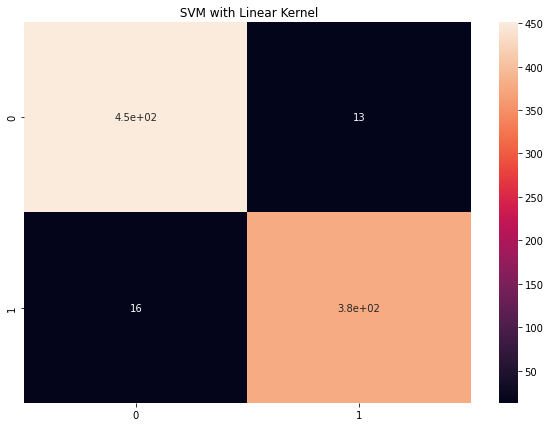

In [229]:
plt.figure(figsize=(10,7))
plt.title(" SVM with Linear Kernel")
sns.heatmap(confusion_matrix(y_test,predictions_linear),annot=True)
plt.show()

## Polynomial( Deg=3) Kernel

In [230]:

clf_poly = SVC(kernel='poly')
clf_poly.fit(X_train, y_train)
 
# print prediction results
from sklearn.metrics import classification_report
predictions_poly = clf_poly.predict(X_test)
print(classification_report(y_test, predictions_poly))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       464
           1       0.81      0.97      0.88       395

    accuracy                           0.88       859
   macro avg       0.89      0.89      0.88       859
weighted avg       0.89      0.88      0.88       859



In [231]:
confusion_matrix(y_test,predictions_poly)

array([[372,  92],
       [ 12, 383]], dtype=int64)

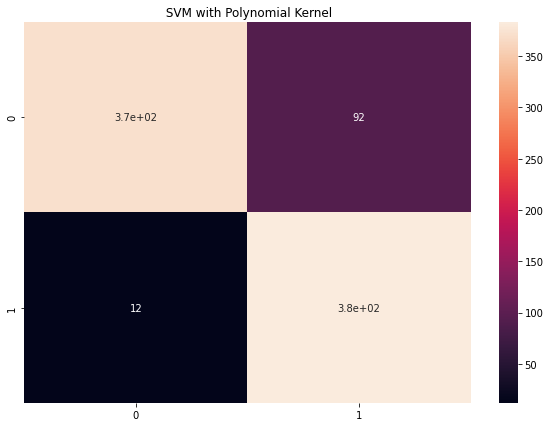

In [232]:
plt.figure(figsize=(10,7))
plt.title(" SVM with Polynomial Kernel")
sns.heatmap(confusion_matrix(y_test,predictions_poly),annot=True)
plt.show()

## Quadratic Kernel

In [233]:
clf_quad = SVC(kernel='poly',degree=2)
clf_quad.fit(X_train, y_train)
 
# print prediction results
from sklearn.metrics import classification_report
predictions_quad = clf_quad.predict(X_test)
print(classification_report(y_test, predictions_quad))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       464
           1       0.85      0.93      0.89       395

    accuracy                           0.89       859
   macro avg       0.89      0.90      0.89       859
weighted avg       0.90      0.89      0.89       859



In [234]:
confusion_matrix(y_test,predictions_quad)

array([[399,  65],
       [ 27, 368]], dtype=int64)

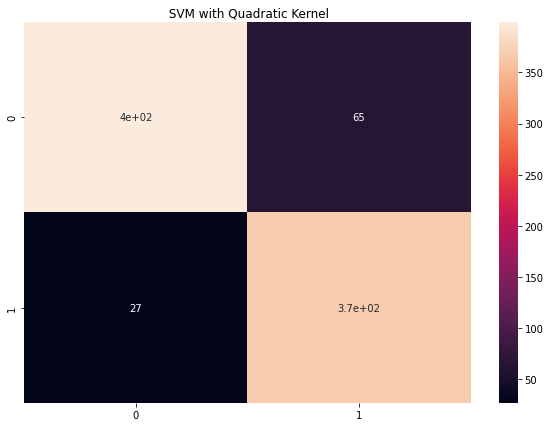

In [235]:
plt.figure(figsize=(10,7))
plt.title(" SVM with Quadratic Kernel")
sns.heatmap(confusion_matrix(y_test,predictions_quad),annot=True)
plt.show()

## Cubic Kernel

In [236]:
clf_cubic = SVC(kernel='poly',degree=3)
clf_cubic.fit(X_train, y_train)
 
# print prediction results
from sklearn.metrics import classification_report
predictions_cubic = clf_cubic.predict(X_test)
print(classification_report(y_test, predictions_cubic))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       464
           1       0.81      0.97      0.88       395

    accuracy                           0.88       859
   macro avg       0.89      0.89      0.88       859
weighted avg       0.89      0.88      0.88       859



In [237]:
confusion_matrix(y_test,predictions_cubic)

array([[372,  92],
       [ 12, 383]], dtype=int64)

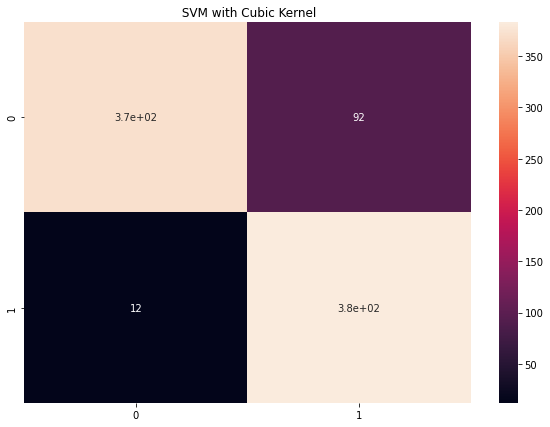

In [238]:
plt.figure(figsize=(10,7))
plt.title(" SVM with Cubic Kernel")
sns.heatmap(confusion_matrix(y_test,predictions_cubic),annot=True)
plt.show()


## RBF Kernel

In [239]:
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
 
# print prediction results
from sklearn.metrics import classification_report
predictions_rbf = clf_rbf.predict(X_test)
print(classification_report(y_test, predictions_rbf))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       464
           1       0.91      0.93      0.92       395

    accuracy                           0.93       859
   macro avg       0.93      0.93      0.93       859
weighted avg       0.93      0.93      0.93       859



In [240]:
confusion_matrix(y_test,predictions_rbf)

array([[428,  36],
       [ 27, 368]], dtype=int64)

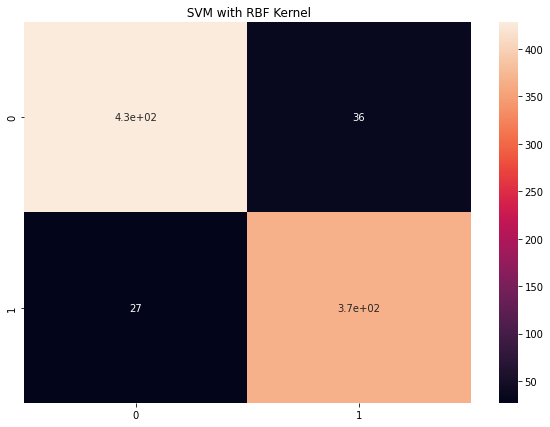

In [241]:
plt.figure(figsize=(10,7))
plt.title(" SVM with RBF Kernel")
sns.heatmap(confusion_matrix(y_test,predictions_rbf),annot=True)
plt.show()

## Linear Kernel is best

In [242]:
X_test

array([[-1.3805963e+02,  9.5462738e+01, -8.6288834e+01, ...,
         3.9493041e+00, -4.2824183e+00, -2.6859369e+00],
       [-1.6071819e+02,  1.4590021e+02, -5.0714870e+01, ...,
         3.1347663e+00, -6.0873442e+00,  4.4993811e+00],
       [-1.1313710e+03,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [-1.3182570e+02,  1.4155185e+02, -5.5230263e+01, ...,
         5.3882751e+00,  1.6864628e+00, -2.4216821e+00],
       [-1.5302577e+02,  1.2521889e+02, -5.9191364e+01, ...,
         5.8160186e-01,  3.8962286e+00, -2.2001352e+00],
       [-2.8819852e+02,  7.2432999e+01, -7.4816658e+01, ...,
        -4.8781357e+00,  4.4494128e+00, -6.2131448e+00]], dtype=float32)

In [243]:
predictions_rbf

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,

In [244]:
y_test

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,

In [245]:
y_train

array([1, 0, 0, ..., 1, 1, 1])

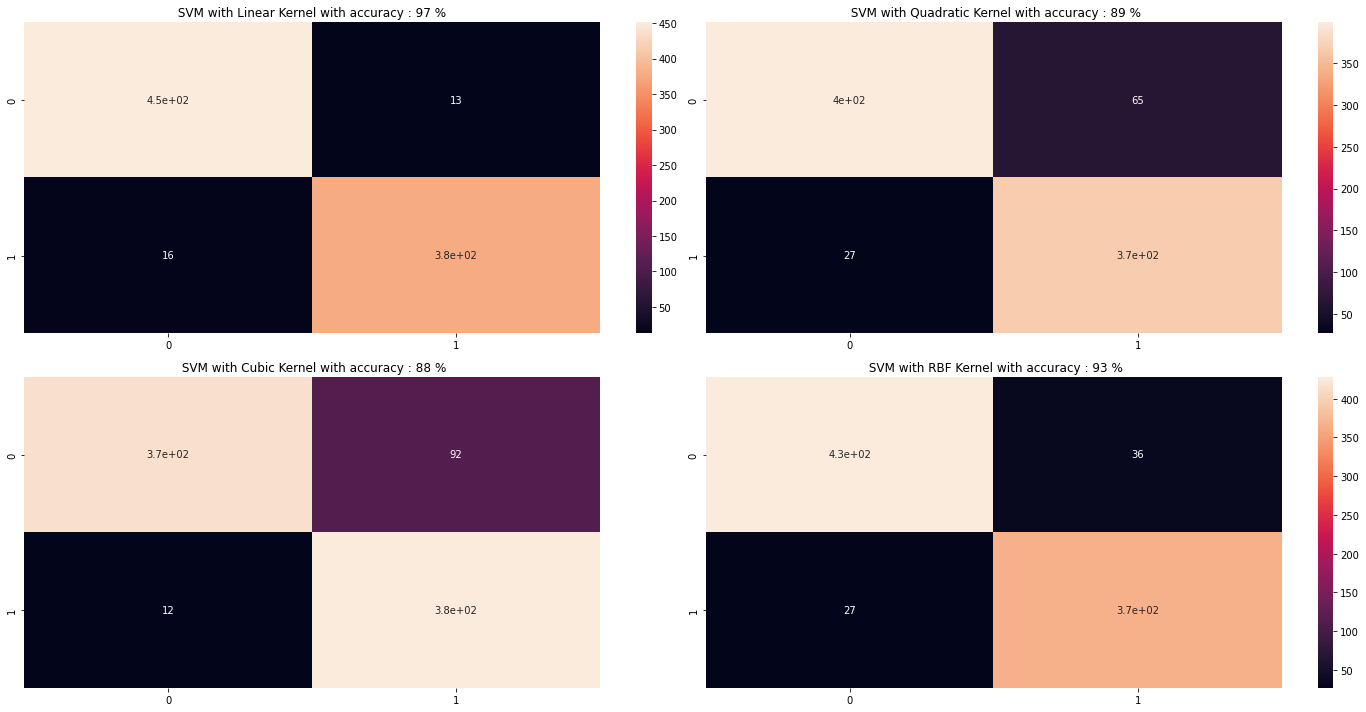

In [246]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title(" SVM with Linear Kernel with accuracy : 97 % ")
sns.heatmap(confusion_matrix(y_test,predictions_linear),annot=True)
plt.tight_layout()

plt.subplot(2,2,2)
plt.title(" SVM with Quadratic Kernel with accuracy : 89 %")
sns.heatmap(confusion_matrix(y_test,predictions_quad),annot=True)
plt.tight_layout()


plt.subplot(2,2,3)
plt.title(" SVM with Cubic Kernel with accuracy : 88 %")
sns.heatmap(confusion_matrix(y_test,predictions_cubic),annot=True)
plt.tight_layout()


plt.subplot(2,2,4)
plt.title(" SVM with RBF Kernel with accuracy : 93 %")
sns.heatmap(confusion_matrix(y_test,predictions_rbf),annot=True)
plt.tight_layout()


# ANN

In [247]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [248]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###second layer
model.add(Dense(200))
model.add(Dropout(0.5))

###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###fourth layer
# model.add(Dense(50))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
#model.add(Flatten())


###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [249]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
activation_4 (Activation)    (None, 100)              

In [250]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [251]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='D://Audio Classification Drone//audio_classification_with_SVM_notebook_model3.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history= model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
63/63 [==============================] - 2s 15ms/step - loss: 13.4165 - accuracy: 0.6680 - val_loss: 0.7667 - val_accuracy: 0.8638

Epoch 00001: val_loss improved from inf to 0.76669, saving model to D://Audio Classification Drone\audio_classification_with_SVM_notebook_model3.hdf5
Epoch 2/100
63/63 [==============================] - 1s 10ms/step - loss: 4.1343 - accuracy: 0.7668 - val_loss: 0.4268 - val_accuracy: 0.8836

Epoch 00002: val_loss improved from 0.76669 to 0.42682, saving model to D://Audio Classification Drone\audio_classification_with_SVM_notebook_model3.hdf5
Epoch 3/100
63/63 [==============================] - 1s 9ms/step - loss: 2.4889 - accuracy: 0.8053 - val_loss: 0.3607 - val_accuracy: 0.8929

Epoch 00003: val_loss improved from 0.42682 to 0.36066, saving model to D://Audio Classification Drone\audio_classification_with_SVM_notebook_model3.hdf5
Epoch 4/100
63/63 [==============================] - 1s 9ms/step - loss: 1.4467 - accuracy: 0.8288 - val_loss: 0.

In [252]:
test_accuracy=model.evaluate(X_test,y_test)
print("Test accuracy is : " , test_accuracy[1] )

27/27 [==============================] - 0s 7ms/step - loss: 0.0759 - accuracy: 0.9779
Test accuracy is :  0.9778812527656555


In [253]:
history.history["loss"]

[13.41650676727295,
 4.134308815002441,
 2.4888908863067627,
 1.4467092752456665,
 1.1120437383651733,
 0.7805123925209045,
 0.6185956001281738,
 0.5797066688537598,
 0.46108368039131165,
 0.42444708943367004,
 0.35949739813804626,
 0.3494851589202881,
 0.2990141808986664,
 0.30753475427627563,
 0.3026668131351471,
 0.2893039286136627,
 0.25258439779281616,
 0.25514253973960876,
 0.23813579976558685,
 0.20044410228729248,
 0.24824461340904236,
 0.21127796173095703,
 0.20033249258995056,
 0.2044120877981186,
 0.19017696380615234,
 0.1931622326374054,
 0.1935880184173584,
 0.1735094040632248,
 0.16675512492656708,
 0.16834011673927307,
 0.15509113669395447,
 0.17510442435741425,
 0.13865791261196136,
 0.14297795295715332,
 0.15702734887599945,
 0.162270650267601,
 0.13317139446735382,
 0.1249656230211258,
 0.1334027200937271,
 0.10967700928449631,
 0.12620632350444794,
 0.12618641555309296,
 0.11271172016859055,
 0.11201991140842438,
 0.1077791154384613,
 0.09662813693284988,
 0.10242286

In [254]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["accuracy"])
    ax2.plot(history.history["val_accuracy"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()


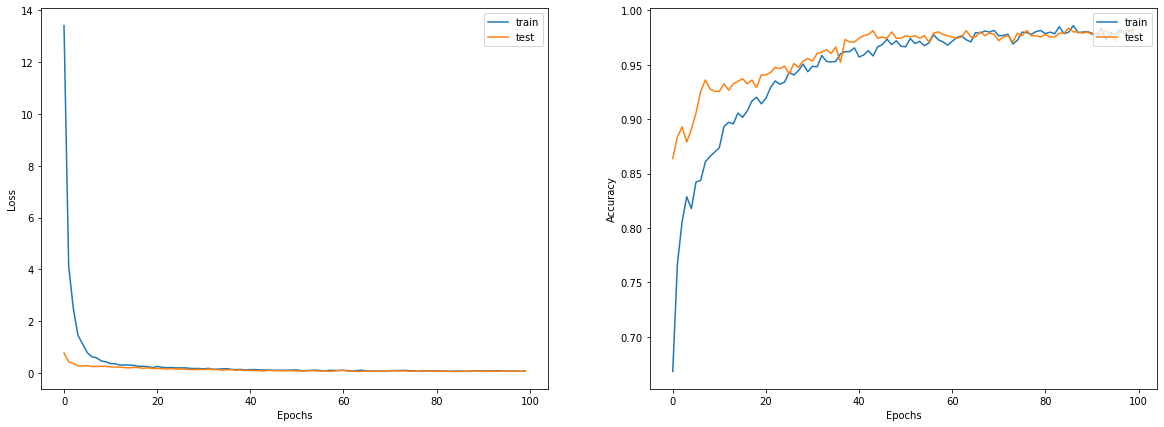

In [255]:
display_learning_curves(history)

In [256]:
os.getcwd()

'd:\\Audio Classification Drone\\DroneAudioDataset-master\\Binary_Drone_Audio'

In [257]:
filename="C:\\Users\\Aditya Mehrotra\\Downloads\\birds sound.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)

predicted_label= model.predict(prediction_feature)


# b=tf.math.argmax(predicted_label,axis=0)

# print(predicted_label>0.5)
# print(b)
# predicted_label.astype('int64')

print(predicted_label)

[[0.8175373  0.18246265]]


# Predict with ANN

In [258]:
def features_extractor(file):
    plt.figure(figsize=(15,10))
    
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    
    librosa.display.waveshow(audio, sr=sample_rate)
    print("Sample rate : " , sample_rate)
    
    
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    ipd.Audio(file)
    
    return mfccs_scaled_features

In [259]:
def predict_sound_ann(filename):
    prediction_feature=features_extractor(filename)
    prediction_feature=prediction_feature.reshape(1,-1)

    predicted_label= model.predict(prediction_feature)


    # b=tf.math.argmax(predicted_label,axis=0)

    # print(predicted_label>0.5)
    # print(b)
    # predicted_label.astype('int64')
    print(" Class 0 represents Audio is Unknown ")
    print(" Class 1 represents Audio is of Drone ")
    print("Probabilities of predicted classes are " , predicted_label)
    
    if(predicted_label[0][0] > 0.5):
        print(" \n Output : Unknown ")
    elif(0.5 < predicted_label[0][1]):
        print(" \n Output : Drone ")
    else:
        print(" Can't Say anything ")
   
    

Sample rate :  22050
 Class 0 represents Audio is Unknown 
 Class 1 represents Audio is of Drone 
Probabilities of predicted classes are  [[0.62035453 0.3796455 ]]
 
 Output : Unknown 


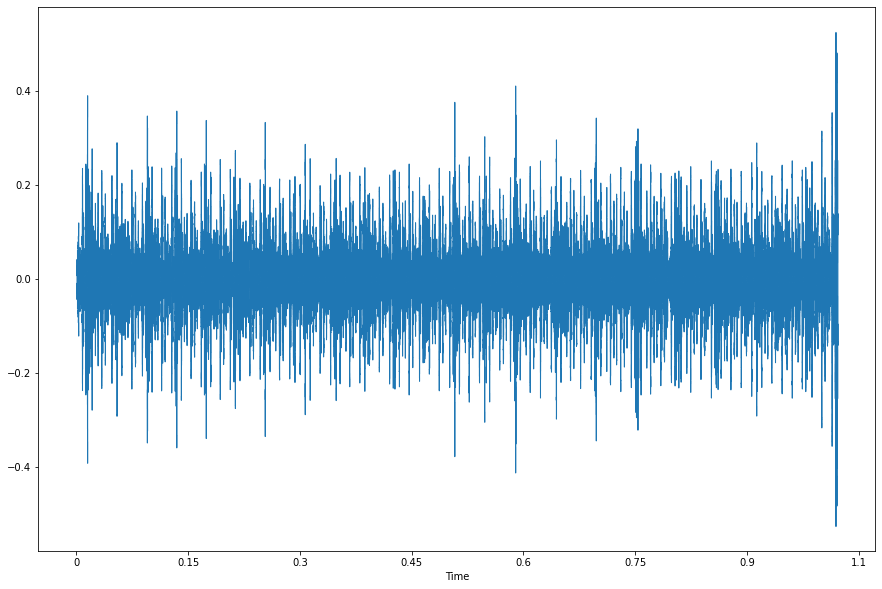

In [260]:
predict_sound_ann("C:\\Users\\Aditya Mehrotra\\Downloads\\1-19898-A-411.wav")

In [261]:
    ipd.Audio("C:\\Users\\Aditya Mehrotra\\Downloads\\1-19898-A-411.wav")

# Predict with Linear Kernel SVM

In [262]:
def features_extractor(file):
    plt.figure(figsize=(15,10))
    
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    
    librosa.display.waveshow(audio, sr=sample_rate)
    print("Sample rate : " , sample_rate)
    
    
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    ipd.Audio(file)
    
    return mfccs_scaled_features

In [263]:
def predict_sound_svm(filename):
    prediction_feature=features_extractor(filename)
    prediction_feature=prediction_feature.reshape(1,-1)

    predicted_label= clf_linear.predict(prediction_feature)

    print(" Class 0 represents Audio is Unknown ")
    print(" Class 1 represents Audio is of Drone ")
    print(" Predicted class is  " , predicted_label)
    
    if(predicted_label[0]== 0):
        print(" \n Output : Unknown ")
    elif(predicted_label[0]== 1):
        print(" \n Output : Drone ")
    else:
        print(" Can't Say anything ")

Sample rate :  22050
 Class 0 represents Audio is Unknown 
 Class 1 represents Audio is of Drone 
 Predicted class is   [0]
 
 Output : Unknown 


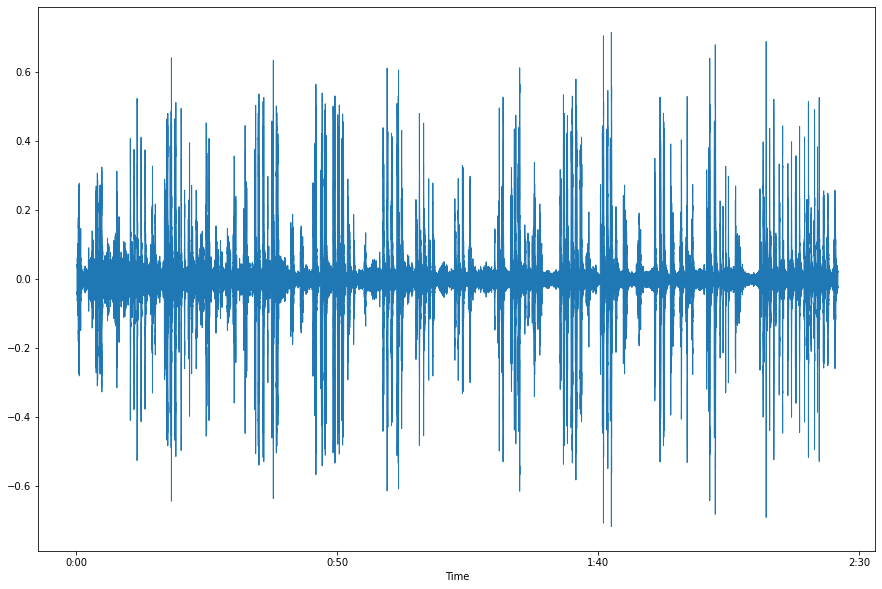

In [264]:
predict_sound_svm("C:\\Users\\Aditya Mehrotra\\Downloads\\birds sound.wav")

# Testing Custom Data

In [265]:
os.chdir("d:\\Audio Classification Drone\\Mytest data")

In [266]:
os.getcwd()

'd:\\Audio Classification Drone\\Mytest data'

In [267]:
print(os.listdir())

['123-[AudioTrimmer.com].wav', 'BACKGROUND_009.wav', 'BACKGROUND_010.wav', 'BACKGROUND_014.wav', 'BACKGROUND_030.wav', 'birds sound.wav', 'drone SoundEffectsFactory.wav', 'Flying Drone Sound Effect - Free Sound Stock.wav', 'HELICOPTER_028.wav', 'mixkit-rain-and-thunder-storm-2390.wav', 'TunePocket-Flying-Drone-Preview.wav']


In [268]:
test_path=os.getcwd()

In [269]:
testfiles =get_file_paths(test_path)

In [270]:
testfiles

['d:\\Audio Classification Drone\\Mytest data\\123-[AudioTrimmer.com].wav',
 'd:\\Audio Classification Drone\\Mytest data\\BACKGROUND_009.wav',
 'd:\\Audio Classification Drone\\Mytest data\\BACKGROUND_010.wav',
 'd:\\Audio Classification Drone\\Mytest data\\BACKGROUND_014.wav',
 'd:\\Audio Classification Drone\\Mytest data\\BACKGROUND_030.wav',
 'd:\\Audio Classification Drone\\Mytest data\\birds sound.wav',
 'd:\\Audio Classification Drone\\Mytest data\\drone SoundEffectsFactory.wav',
 'd:\\Audio Classification Drone\\Mytest data\\Flying Drone Sound Effect - Free Sound Stock.wav',
 'd:\\Audio Classification Drone\\Mytest data\\HELICOPTER_028.wav',
 'd:\\Audio Classification Drone\\Mytest data\\mixkit-rain-and-thunder-storm-2390.wav',
 'd:\\Audio Classification Drone\\Mytest data\\TunePocket-Flying-Drone-Preview.wav']

**************************************************


 Audio name is :  d:\Audio Classification Drone\Mytest data\123-[AudioTrimmer.com].wav
Sample rate :  22050
 Class 0 represents Audio is Unknown 
 Class 1 represents Audio is of Drone 
Probabilities of predicted classes are  [[0.3145671 0.6854329]]
 
 Output : Drone 


**************************************************
**************************************************


 Audio name is :  d:\Audio Classification Drone\Mytest data\BACKGROUND_009.wav
Sample rate :  22050
 Class 0 represents Audio is Unknown 
 Class 1 represents Audio is of Drone 
Probabilities of predicted classes are  [[0.5975843  0.40241563]]
 
 Output : Unknown 


**************************************************
**************************************************


 Audio name is :  d:\Audio Classification Drone\Mytest data\BACKGROUND_010.wav
Sample rate :  22050
 Class 0 represents Audio is Unknown 
 Class 1 represents Audio is of Drone 
Probabilities of predicted

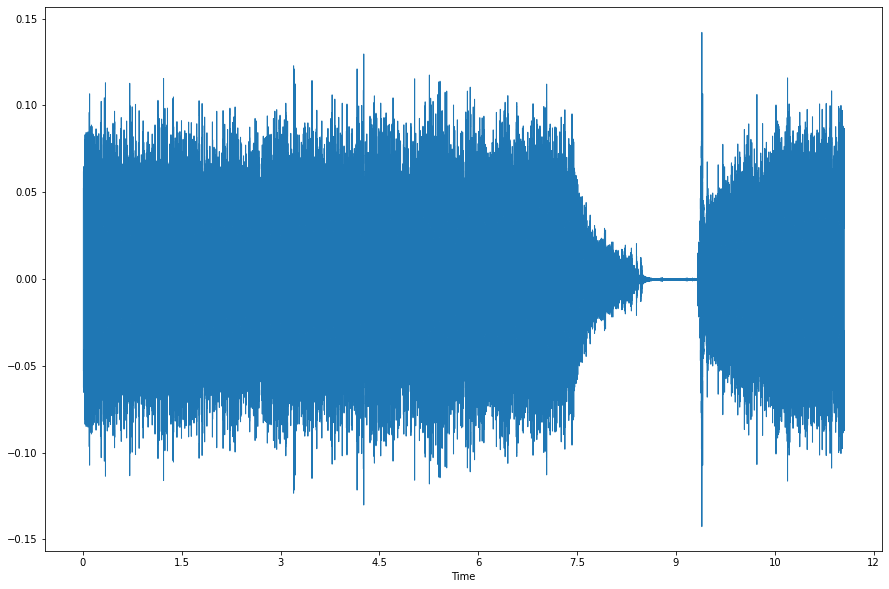

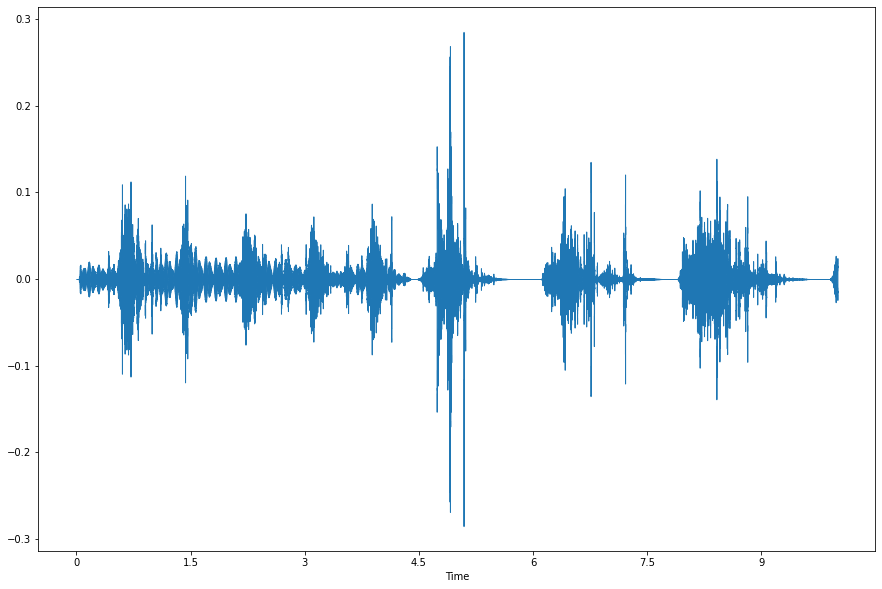

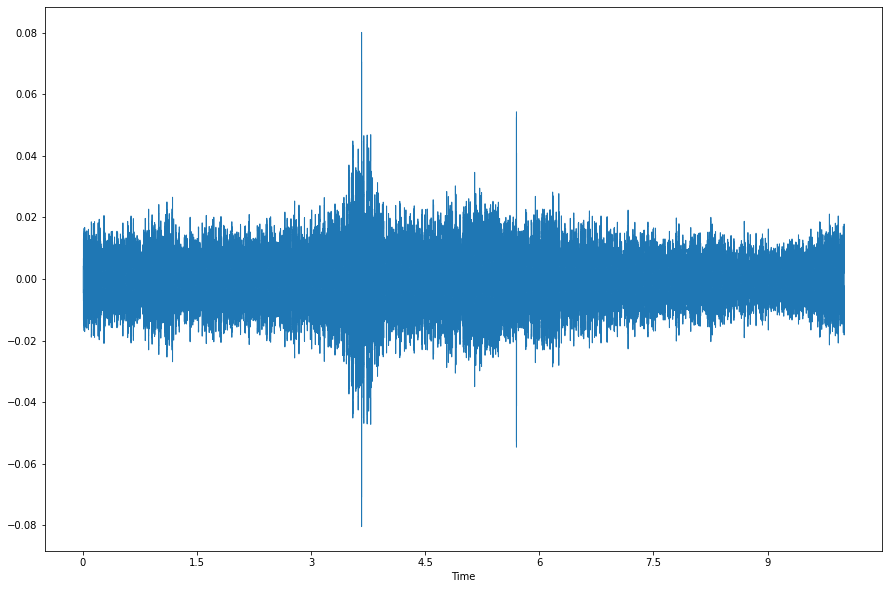

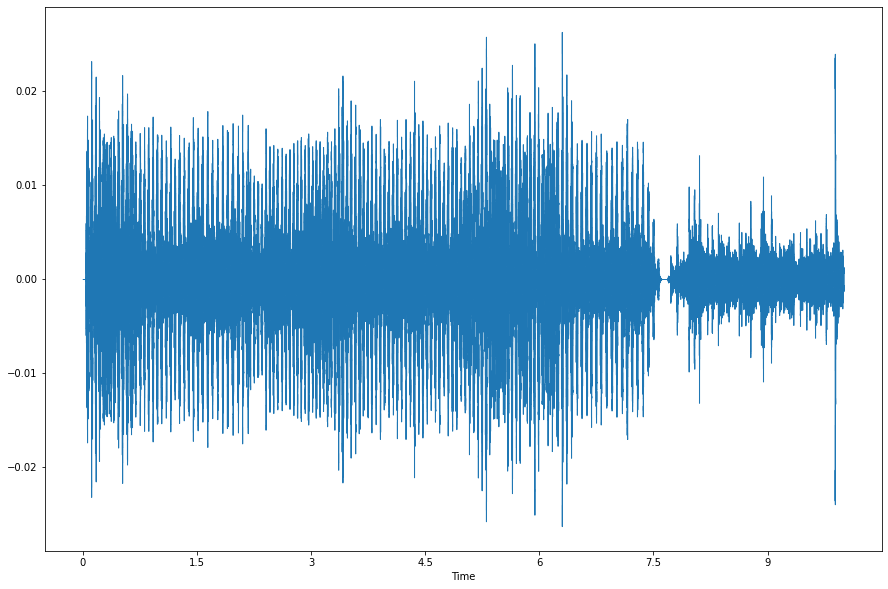

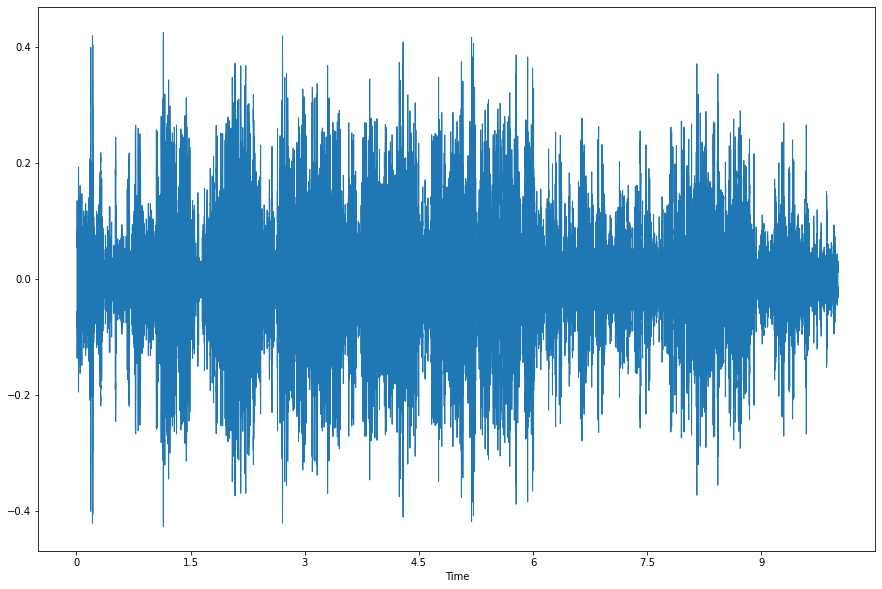

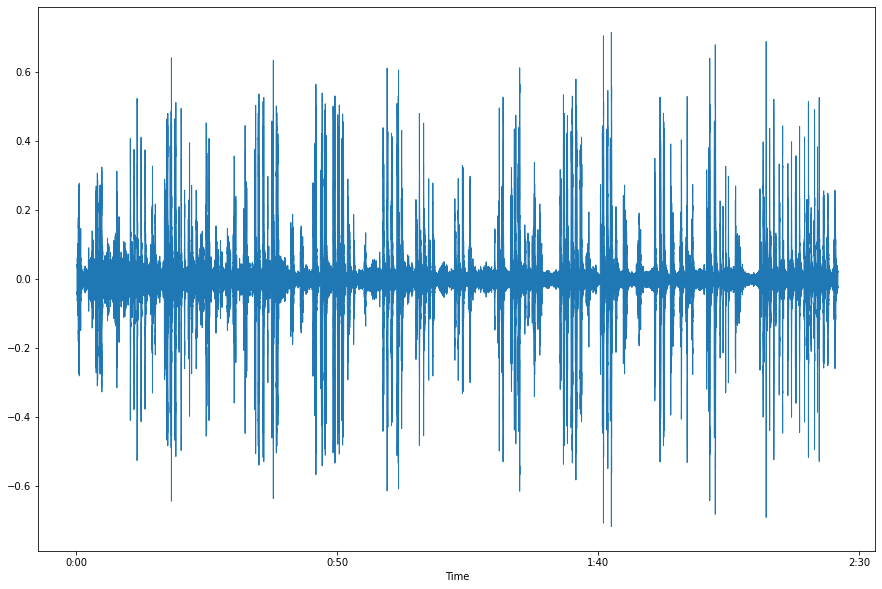

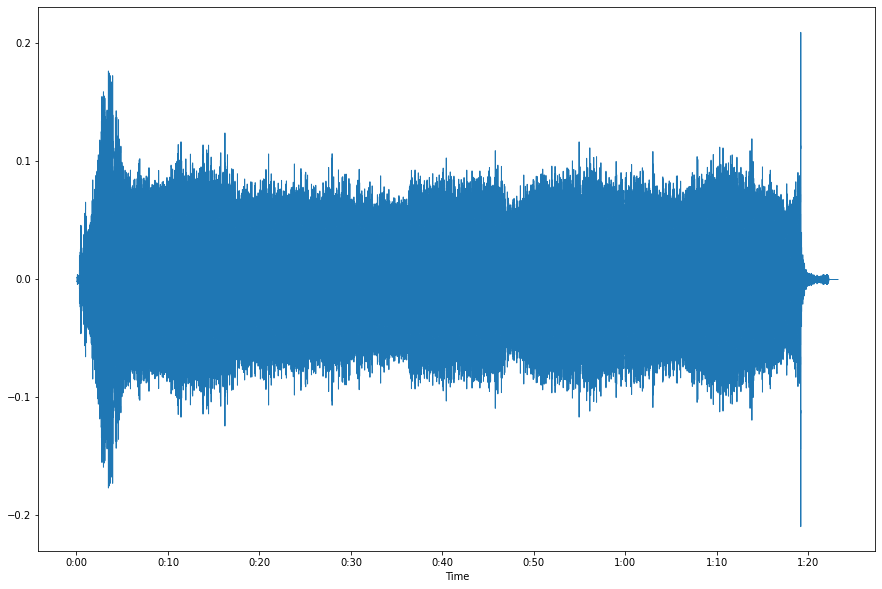

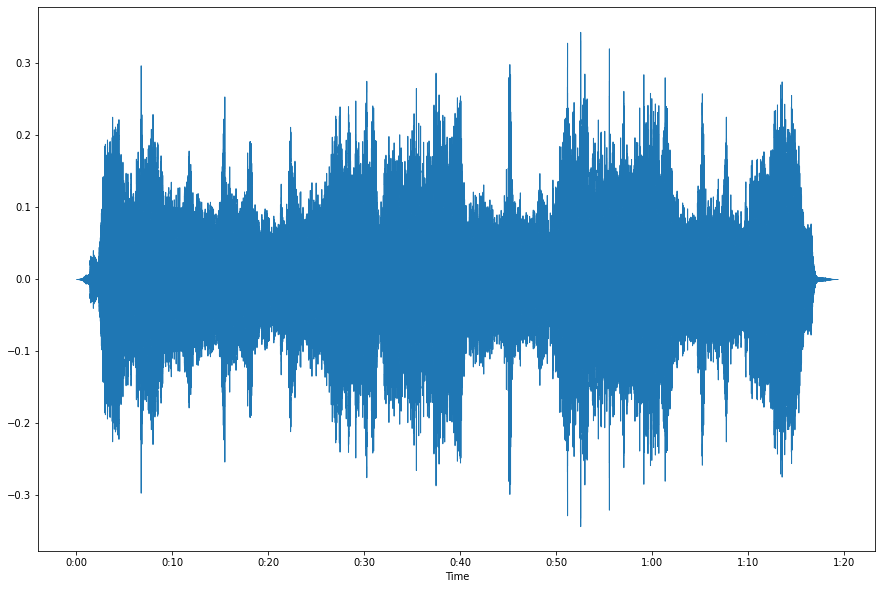

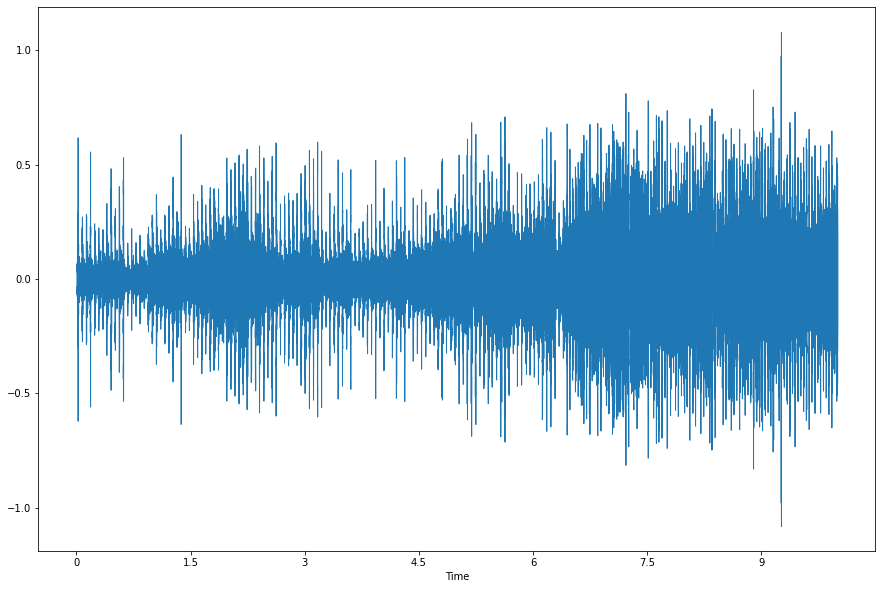

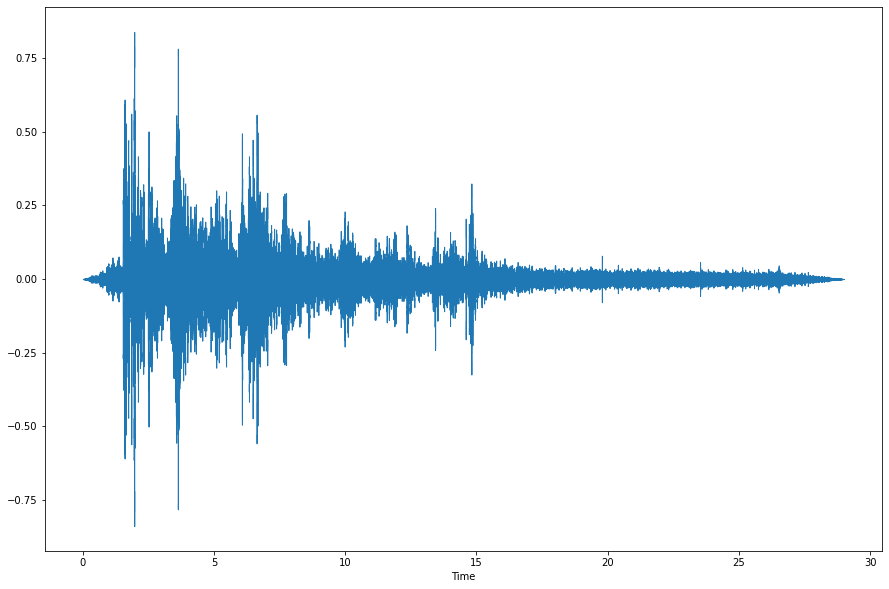

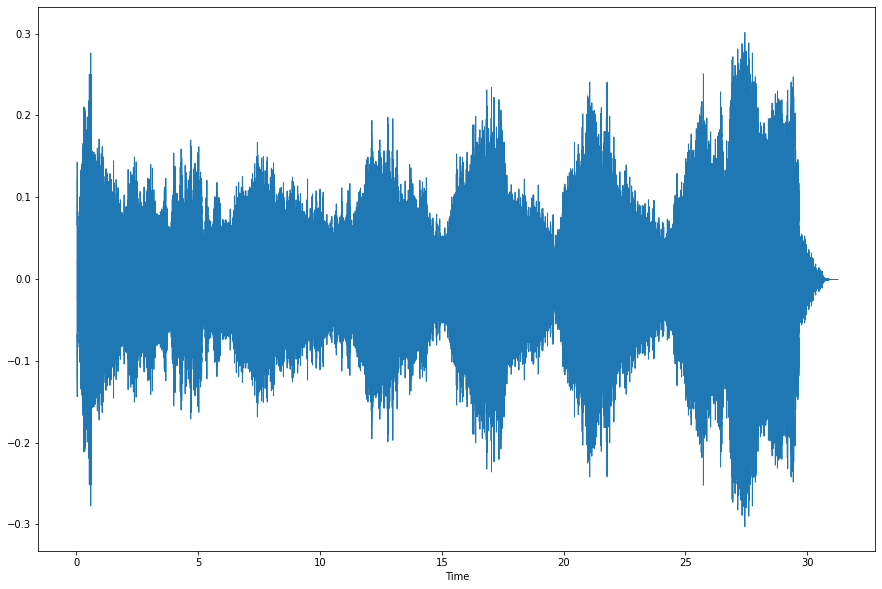

In [271]:
for sound in testfiles:
    print('*' * 50)
    print('\n')
    print(" Audio name is : ", sound)
    predict_sound_ann(sound)
    print('\n')
    print('*' * 50)
    

Sample rate :  22050
 Class 0 represents Audio is Unknown 
 Class 1 represents Audio is of Drone 
Probabilities of predicted classes are  [[9.9969804e-01 3.0200268e-04]]
 
 Output : Unknown 


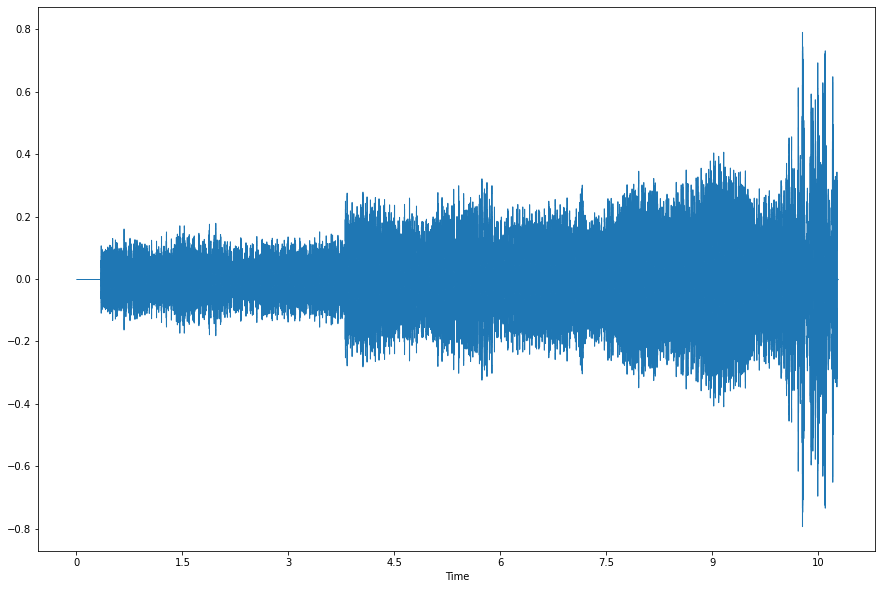

In [272]:
predict_sound_ann("C:\\Users\\Aditya Mehrotra\\Downloads\\fannoise.wav")